In [28]:
# 모듈 생성

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

In [29]:
fishesDF = pd.read_excel('어업별_품종별_통계.xlsx')

In [30]:
wt_2014 = pd.read_csv('water_temp_2014.csv', encoding='euc_kr')
wt_2015 = pd.read_csv('water_temp_2015.csv', encoding='euc_kr')
wt_2016 = pd.read_csv('water_temp_2016.csv', encoding='euc_kr')
wt_2017 = pd.read_csv('water_temp_2017.csv', encoding='euc_kr')
wt_2018 = pd.read_csv('water_temp_2018.csv', encoding='euc_kr')
wt_2019 = pd.read_csv('water_temp_2019.csv', encoding='euc_kr')
wt_2020 = pd.read_csv('water_temp_2020.csv', encoding='euc_kr')
wt_2021 = pd.read_csv('water_temp_2021.csv', encoding='euc_kr')
wt_2022 = pd.read_csv('water_temp_2022.csv', encoding='euc_kr')
wt_2023 = pd.read_csv('water_temp_2023.csv', encoding='euc_kr')

In [31]:
temp_list = [wt_2014, wt_2015, wt_2016, wt_2017, wt_2018,
             wt_2019, wt_2020, wt_2021, wt_2022, wt_2023]

def make_month_temp(data):
    list_data = []
    for i in range(len(data)):
        list_data.append(data['일시'][i][:7])
    data['일시'] = list_data
    data

    month_temp = []
    for i in sorted(data['일시'].value_counts().index):
        if data.columns[8] == '수온(°C)':
            month_temp.append(data[data['일시'] == i]['수온(°C)'].mean())
        else:
            month_temp.append(data[data['일시'] == i]['평균 수온(°C)'].mean())
    return month_temp

def make_df(fish, *columns):
    total_temp = []
    for i in temp_list:
        total_temp += make_month_temp(i)
    fish_product = fish.loc[1:,columns]

    fish_data = []
    for i in range(1, len(fish_product)+1):
        fish_data.append(fish_product.loc[i].sum())

    year = []
    for i in range(1, len(fish['시점'])):
        year.append(int(fish['시점'][i]))

    month = []
    month_list = [i for i in range(1,13)] * 10
    for i in month_list:
        month.append(str(i)+'월')

    year_month = []
    for i in list(fish['시점'][1:]):
        year_month.append(str(i) + '월')
    

    df = pd.DataFrame({'시점' : list(fish['시점'][1:]), 
                       '어획량' : fish_data,
                       '수온' : total_temp,
                       '년도' : year,
                       '년월' : year_month,
                       '월': month})
    return df

In [32]:
kkongciDF = make_df(fishesDF, '꽁치')
kkongciDF

,시점,어획량,수온,년도,년월,월
0,2014.01,23,12.914825,2014,2014.01월,1월
1,2014.02,16,11.535285,2014,2014.02월,2월
2,2014.03,39,10.651902,2014,2014.03월,3월
3,2014.04,87,13.357103,2014,2014.04월,4월
4,2014.05,65,15.639946,2014,2014.05월,5월
...,...,...,...,...,...,...
115,2023.08,0,27.354839,2023,2023.08월,8월
116,2023.09,0,25.313793,2023,2023.09월,9월
117,2023.10,7,21.706452,2023,2023.1월,10월
118,2023.11,6,19.380000,2023,2023.11월,11월


In [33]:
kkongciDF['시점'].astype(object)

0      2014.01
1      2014.02
2      2014.03
3      2014.04
4      2014.05
        ...   
115    2023.08
116    2023.09
117     2023.1
118    2023.11
119    2023.12
Name: 시점, Length: 120, dtype: object

In [34]:
kkongciDF.head(20)

,시점,어획량,수온,년도,년월,월
0,2014.01,23,12.914825,2014,2014.01월,1월
1,2014.02,16,11.535285,2014,2014.02월,2월
2,2014.03,39,10.651902,2014,2014.03월,3월
3,2014.04,87,13.357103,2014,2014.04월,4월
4,2014.05,65,15.639946,2014,2014.05월,5월
5,2014.06,16,19.966064,2014,2014.06월,6월
6,2014.07,1,23.713324,2014,2014.07월,7월
7,2014.08,1,23.695232,2014,2014.08월,8월
8,2014.09,36,23.876685,2014,2014.09월,9월
9,2014.10,5,20.578108,2014,2014.1월,10월


In [35]:
kkongciDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      120 non-null    float64
 1   어획량     120 non-null    int64  
 2   수온      120 non-null    float64
 3   년도      120 non-null    int64  
 4   년월      120 non-null    object 
 5   월       120 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 5.8+ KB


In [36]:
kkongciDF['년도']=kkongciDF['년도'].astype('object')

In [37]:
kkongciDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      120 non-null    float64
 1   어획량     120 non-null    int64  
 2   수온      120 non-null    float64
 3   년도      120 non-null    object 
 4   년월      120 non-null    object 
 5   월       120 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.8+ KB


In [38]:
kkongciDF.columns

Index(['시점', '어획량', '수온', '년도', '년월', '월'], dtype='object')

In [39]:
kkongciDF['월']

0       1월
1       2월
2       3월
3       4월
4       5월
      ... 
115     8월
116     9월
117    10월
118    11월
119    12월
Name: 월, Length: 120, dtype: object

In [40]:
kkongciDF['년월2'] = kkongciDF['년도'].astype('str')+'년'+kkongciDF['월']

In [41]:
kkongciDF.head()

,시점,어획량,수온,년도,년월,월,년월2
0,2014.01,23,12.914825,2014,2014.01월,1월,2014년1월
1,2014.02,16,11.535285,2014,2014.02월,2월,2014년2월
2,2014.03,39,10.651902,2014,2014.03월,3월,2014년3월
3,2014.04,87,13.357103,2014,2014.04월,4월,2014년4월
4,2014.05,65,15.639946,2014,2014.05월,5월,2014년5월


In [42]:
kkong = kkongciDF[kkongciDF['년도'] == 2014]
kkong['시점']

0     2014.01
1     2014.02
2     2014.03
3     2014.04
4     2014.05
5     2014.06
6     2014.07
7     2014.08
8     2014.09
9     2014.10
10    2014.11
11    2014.12
Name: 시점, dtype: float64

In [43]:
kkongciDF['어획량'].sum()

5668

In [44]:
# 2014년 꽁치 데이터만 가져오기
kkong_14 = kkongciDF[kkongciDF['년도'] == 2014]
kkong_total = kkong_14['어획량'].sum()
print(kkong_total)
corrDF14 = kkong_14[['어획량','수온']]
print(corrDF14.corr())

320
          어획량        수온
어획량  1.000000 -0.464403
수온  -0.464403  1.000000


In [45]:
def year_kkong_num(number):
    kkong = kkongciDF[kkongciDF['년도'] == number]
    kkong_total = kkong['어획량'].sum()
    return kkong['어획량'], kkong_total

def temp_num(number):
    kkong = kkongciDF[kkongciDF['년도'] == number]
    temp_median = round(kkong['수온'].median(), 2)
    return kkong['수온'], temp_median

def year_kkong(number):
    kkong = kkongciDF[kkongciDF['년도'] == number]
    return kkong['년월2']

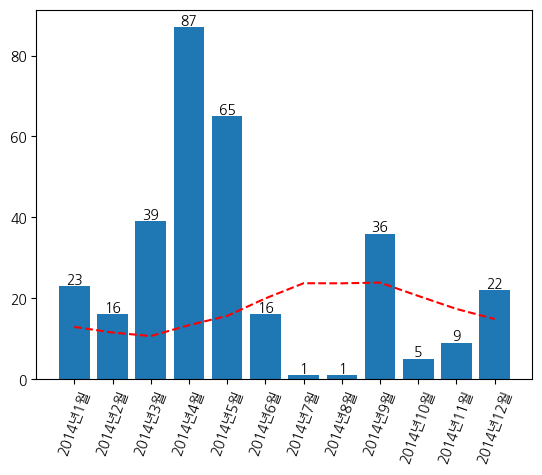

In [46]:
# 2014년도 꽁치 어획량 - 수온 그래프 그리기

a = plt.bar(year_kkong(2014), year_kkong_num(2014)[0])
plt.plot(year_kkong(2014), temp_num(2014)[0], 'r--')
plt.bar_label(a, label_type='edge')
plt.xticks(rotation=70)
plt.show()

In [47]:
def call_corr(number):
    fish = kkongciDF[kkongciDF['년도'] == number]
    fish_temp_DF = fish[['어획량','수온']]
    sum_fish = kkongciDF['어획량'].sum()
    return fish_temp_DF.corr()

In [48]:
call_corr(2014)

,어획량,수온
어획량,1.000000,-0.464403
수온,-0.464403,1.000000


In [49]:
for i in range(2014,2024):
    print(call_corr(i).loc['수온']['어획량'])

-0.46440286553885884
-0.18462341374499708
-0.22994252131602005
-0.1506393358887036
-0.33080348401400317
-0.31715795638433797
-0.2031786692761767
-0.20167983976193268
-0.6986876095472876
-0.618140105306511


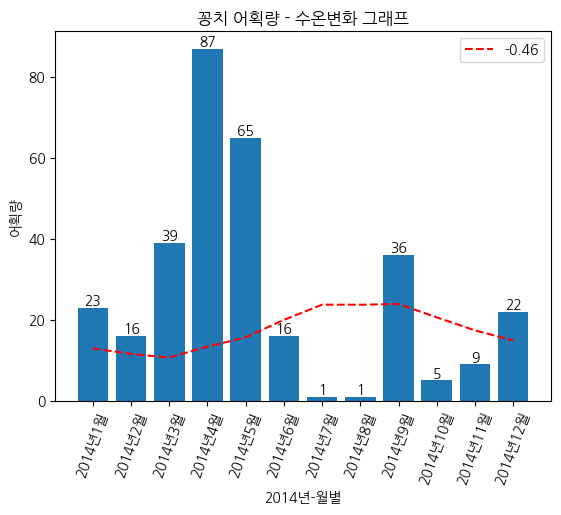

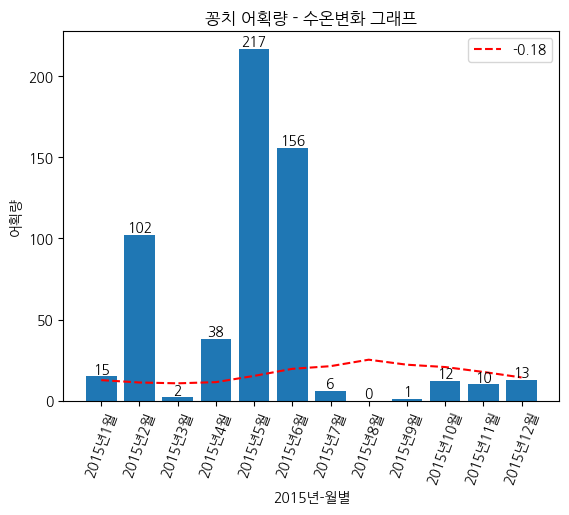

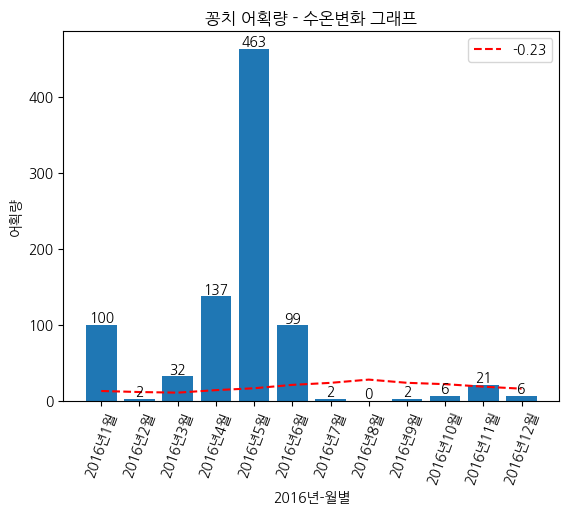

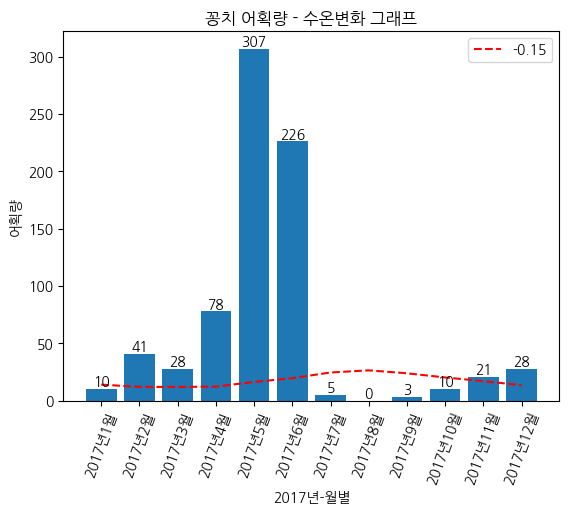

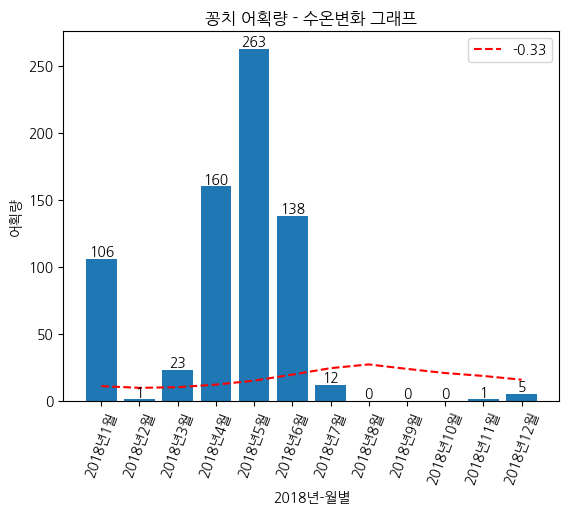

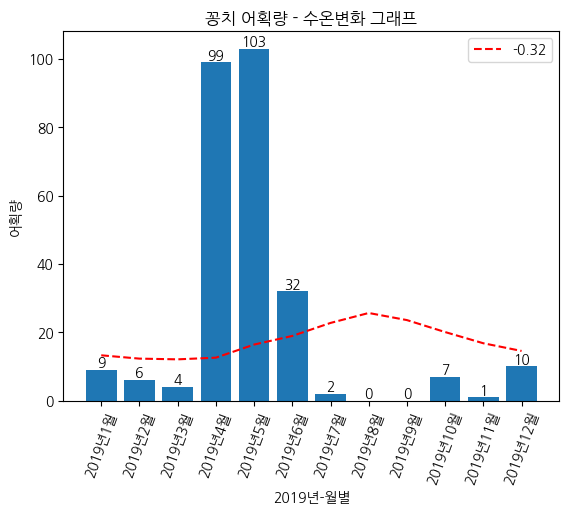

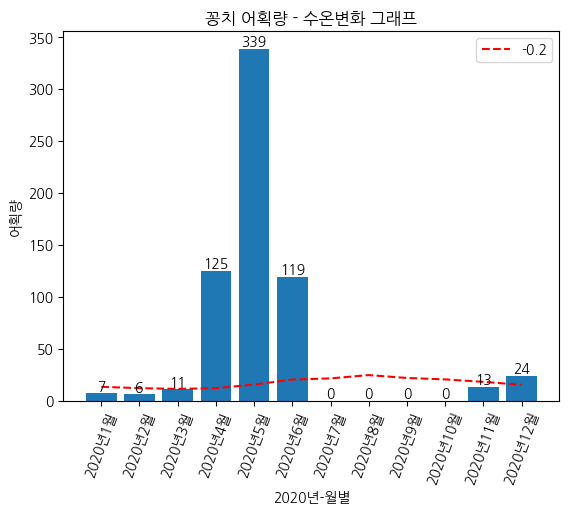

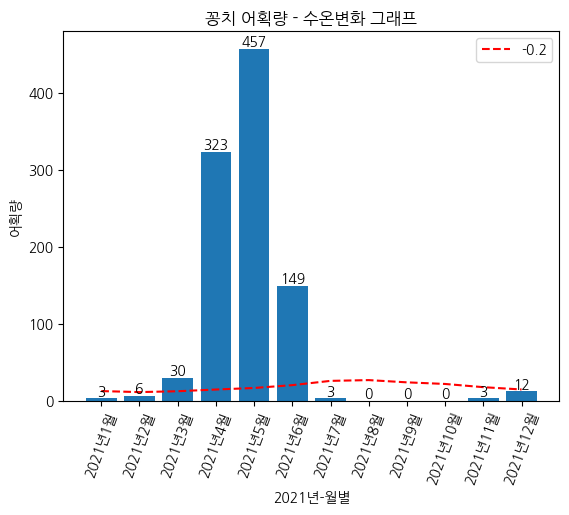

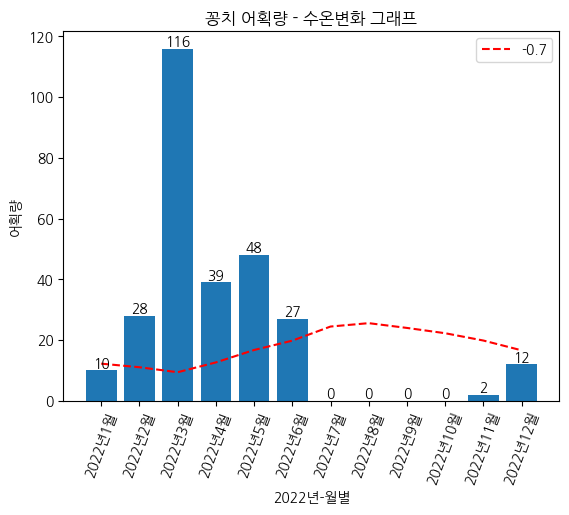

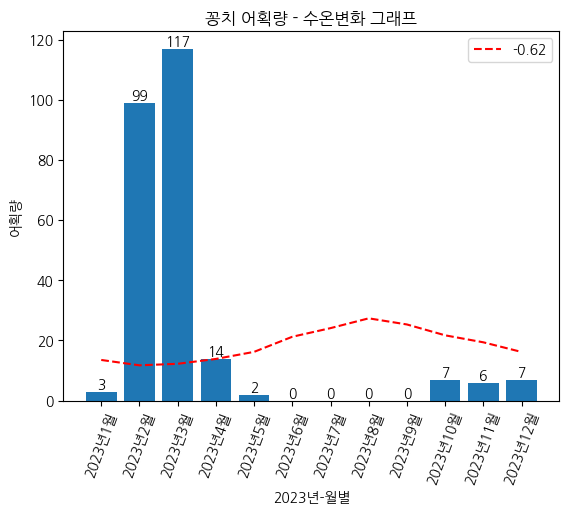

In [50]:
for i in range(2014,2024):
    a = plt.bar(year_kkong(i), year_kkong_num(i)[0])
    plt.plot(year_kkong(i), temp_num(i)[0], 'r--', label=round(call_corr(i).loc['수온']['어획량'], 2))
    plt.bar_label(a, label_type='edge')
    plt.xticks(rotation=70)
    plt.xlabel(f'{i}년-월별')
    plt.ylabel('어획량')
    plt.title('꽁치 어획량 - 수온변화 그래프')
    plt.legend()
    plt.show()

In [51]:
year_kkong_total_list = []
for i in range(2014,2024):
    year_kkong_total_list.append(year_kkong_num(i)[1])
print(year_kkong_total_list)

[320, 572, 870, 757, 709, 273, 644, 986, 282, 255]


In [52]:
year_temp_list = []
for i in range(2014,2024):
    year_temp_list.append(temp_num(i)[1]*10)
print(year_temp_list)

[165.0, 164.60000000000002, 173.1, 166.4, 170.3, 165.9, 167.39999999999998, 169.4, 182.2, 177.89999999999998]


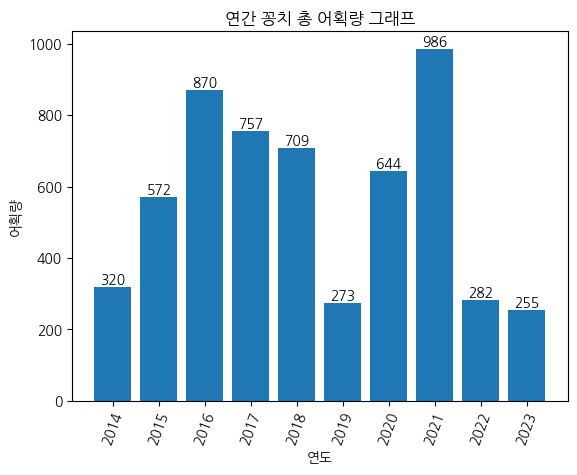

In [53]:
year_list = [i for i in range(2014,2024)]
a = plt.bar(year_list, year_kkong_total_list)
plt.xticks(rotation=70)
plt.bar_label(a, label_type='edge')
plt.xticks(year_list)
plt.title('연간 꽁치 총 어획량 그래프')
plt.xlabel('연도')
plt.ylabel('어획량')
plt.show()

In [54]:
# fishesDF.hist(column=['꽁치랑학꽁치랑','고등어','도루묵','멸치'], bins=50, figsize=(10, 10))